## Mengimport library yang akan digunakan ##
Tahap ini melakukan import atau deklarasi library python yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## Menyiapkan dataset yang digunakan
Tahapan ini melakukan loading dataset yang berasal dari github dicoding academy

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Asesing Data
Tahap ini adalah tahap data wrangling yang berguna untuk menilai kulitas dan melihat data type pada dataset. Proses ini menggunakan beberapa function dari pandas seperti describe() untuk mengeksplorasi dataset, info() untuk melihat tipe data setiap kolum apakah sudah sesuai atau belum, isnull() untuk mengidentifikasi adanya missing value atau tidak, duplicated() untuk mengidentifikasi adanya data yang duplikat atau tidak dan sum() untuk menghitung jumlah missing value ataupun data yang duplikat.

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

data type pada dataset ini sudah sesuai

In [ ]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


dataset tidak ada missing value

In [ ]:
df.duplicated().sum()

np.int64(0)

dataset ini tidak ada data yang duplikat

## Exploratory Data Analisis (EDA)
Tahap ini dilakukan untuk mengenal dataset yang digunakan. Pada submission ini hanya melakukan 2 EDA saja yaitu melihat persebaran data Status mahasiswa dan persebaran data status mahasiswa berdasarkan jenis kelamin.

<ipython-input-7-5115f2522001>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Status'].value_counts().index, y=df['Status'].value_counts(), palette='viridis')


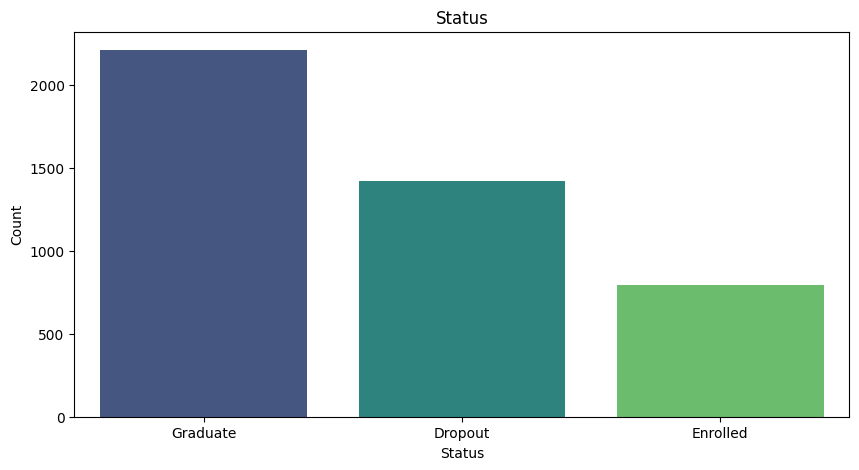

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Status'].value_counts().index, y=df['Status'].value_counts(), palette='viridis')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status')
plt.show()

berdasarkan grafik di atas status mahasiswa yang lulus lebih banyak dari mahasiswa yang dropout

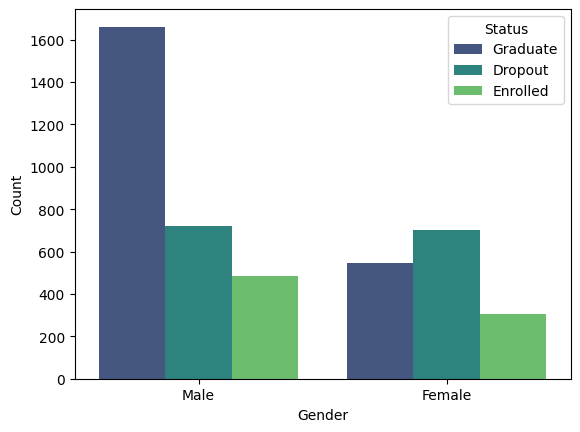

In [ ]:
sns.countplot(df, x='Gender', hue='Status', palette='viridis')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylabel('Count')
plt.show()

berdasarkan grafik di atas mahasiswa berjenis kelamin laki-laki berhasil menyelesaikan kuliah sedangkan pada mahasiswa berjenis kelamin perempuan mahasiswa dropout lebih banyak dari mahasiswa yang lulus.

## Data Preparation ##
Tahap ini menyiapkan data sebelum dilakukan modeling yang bertujuan untuk melakukan encoded, memfilter data yang tidak akan digunakan dan melakukan splitting data.

In [ ]:
df = df[df['Status'] != 'Enrolled']

status_maping = {'Graduate' : 0, 'Dropout' : 1}
df['Status'] = df['Status'].map(status_maping)
df.head()

<ipython-input-9-6ac11890393c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df['Status'].map(status_maping)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


karena pada submission ini hanya berfokus untuk melakukan prediksi mahasiswa yang berpotensi dropout maka mahasiswa yang sedang enrolled akan dibuang.

In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

membagi dataset menjadi 80% data train dan 20% data test serta melakukan standardrisasi pada data X_train dan X_test agar bersebaran data memiliki rentang yang sama.

## Modeling ##
Tahap ini membuat model machine learning untuk memprediksi kemungkinan mahasiswa dropout.

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=30, class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       731
           1       0.93      0.83      0.88       467

    accuracy                           0.91      1198
   macro avg       0.91      0.89      0.90      1198
weighted avg       0.91      0.91      0.91      1198



pada submission ini menggunakan RandomForestClassifier dan menggunakan parameter class_weight='balance' karena terjadi imbalnce data walau tidak besar tetapi berjaga-jaga agar model tidak bias pada data yang lebih dominan.

## Evaluasi ##
Tahapan ini menilai apakah model sudah belajar dengan baik pada dataset yang digunakan. Pada submission ini menggunakan matriks evaluasi precion, recall, f1-score dan confusion matrix. Berdasarkan hasil matriks evaluasi dapat dikatakan bahwa model dapat belajar dengan baik pada dataset walau ada overfitting sedikit.

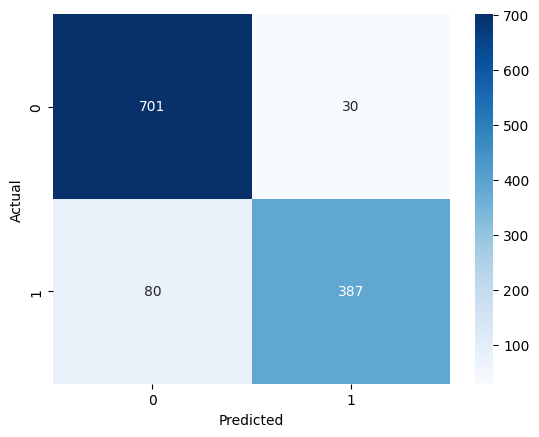

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Selection ##
Pada tahap ini berguna untuk memilih fitur yang memiliki pengaruh yang cukup signifikan pada model.

<ipython-input-13-7b8f12d3799a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importances_sorted.values, y=forest_importances_sorted.index, palette="viridis")


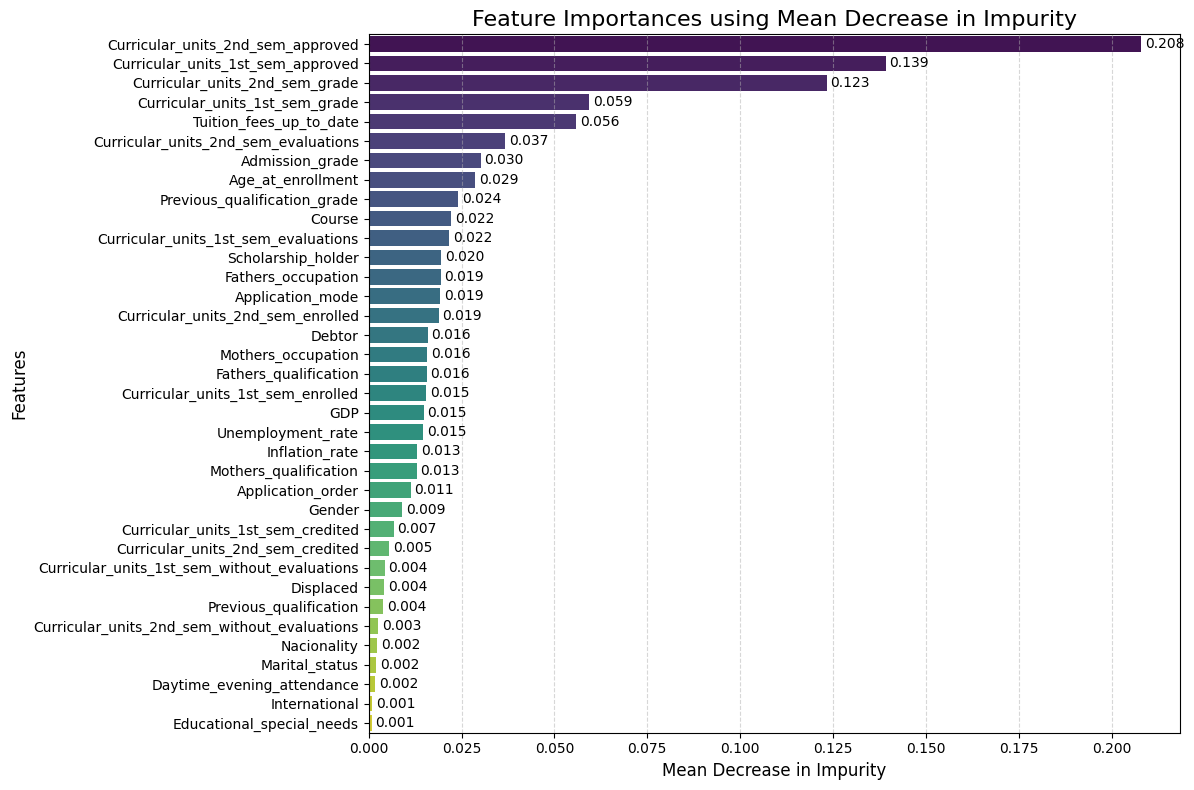

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)


forest_importances_sorted = forest_importances.sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=forest_importances_sorted.values, y=forest_importances_sorted.index, palette="viridis")

plt.title("Feature Importances using Mean Decrease in Impurity", fontsize=16)
plt.xlabel("Mean Decrease in Impurity", fontsize=12)
plt.ylabel("Features", fontsize=12)


for i, v in enumerate(forest_importances_sorted.values):
    plt.text(v + 0.001, i, f"{v:.3f}", color='black', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


Gambar tersebut menunjukkan __Feature Importance__ dari suatu model Machine Learning, yang mengindikasikan fitur mana yang paling berpengaruh dalam menentukan prediksi.

- Membantu memahami fitur mana yang paling signifikan dalam mempengaruhi prediksi model.
- Fitur dengan skor tinggi dapat diprioritaskan dalam analisis lebih lanjut atau optimasi model.
- Fitur dengan skor rendah bisa dipertimbangkan untuk dihapus guna menyederhanakan model.

## Membuat dataset baru ##
Tahap ini melakukan pembuatan datset baru berdasarkan fitur yang memiliki pengaruh pada model

In [ ]:
threshold = 0.02

important_features = forest_importances_sorted[forest_importances_sorted > threshold].index

new_df = df[important_features.tolist() + ['Status']]

new_df.head()

,Curricular_units_2nd_sem_approved,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Curricular_units_2nd_sem_evaluations,Admission_grade,Age_at_enrollment,Previous_qualification_grade,Course,Curricular_units_1st_sem_evaluations,Status
0,0,0,0.000000,0.000000,1,0,127.3,20,122.0,171,0,1
1,6,6,13.666667,14.000000,0,6,142.5,19,160.0,9254,6,0
2,0,0,0.000000,0.000000,0,0,124.8,19,122.0,9070,0,1
3,5,6,12.400000,13.428571,1,10,119.6,20,122.0,9773,8,0
4,6,5,13.000000,12.333333,1,6,141.5,45,100.0,8014,9,0


thrshold digunakan untuk memfilter fitur yang memiliki skor paling rendah 0.2 dapat dimasukkan kedalam dataset yang baru

## Data Preparation ##
Melakukan __data preparation__ ulang untuk splitting dataset yang baru.

In [ ]:
X = new_df.drop('Status', axis=1)
y = new_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling ##
Melakukan pelatihan model kembali dengan dataset yang baru

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       449
           1       0.89      0.82      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



## Save model ##
Tahap ini dilakukan agar model yang sudah dilatih disimpan dan akan dilakukan deploymen.

In [ ]:
bundle = {
    'model': rf_model,
    'scaler': scaler,
    'status_mapping': status_maping
}

joblib.dump(bundle, 'rfmodel.joblib')

['rfmodel.joblib']

agar semua tahap dapat disimpan maka dibuat dict bundle untuk menyimpan tahapan-tahapan pada submission ini.